### TAREFAS 1 e 3

**Ex1**: Analise e quantifique a relação da variável survived com a variável sex usando o conjunto de dados do titanic. Faça seus gráficos e calcule o chi-quadrado para quantificar a relação.

In [1]:
#impotando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#criando o DataFrame utilizando uma planilha csv
df = pd.read_csv("titanic.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Estudando a correlação entre as colunas survived e sex

#Probabilidade de morrer pessoas do sexo masculino:
prob_homem = df[(df.Survived==1) & ( df.Sex=='male')].shape[0] / df[df.Sex=='male'].shape[0]

#Probabilidade de morrer pessoas do sexo feminino:
prob_mulher = df[(df.Survived==1) & ( df.Sex=='female')].shape[0] / df[df.Sex=='female'].shape[0]

#retornar as probabilidades
print("Probabilidade de sobreviver sendo homem:", (round(prob_homem,2)*100)) 
print("Probabilidade de sobreviver sendo mulher:", (round(prob_mulher,2)*100))

Probabilidade de sobreviver sendo homem: 19.0
Probabilidade de sobreviver sendo mulher: 74.0


**Qual sua conclusão a partir dos dados acima?**
Claramente, por algum motivo, existe uma correlação forte entre os dados de sobrevivência e sexo do passageiro.

**Você vê algum indicativo de relação entre ter sobrevivido e o sexo?**
Passageiros do sexo feminino tem maior chance de sobreviver do que o passageiro masculino.

In [4]:
# Usando o código abaixo você consegue obter a quantidade de mulheres e homens que sobreviveram (1) e morreram (0)
# Gera tabela de frequencia absoluta!

df.groupby(['Sex']).apply(lambda x: x.Survived.value_counts()).unstack()

,0,1
Sex,,
female,81,233
male,468,109


In [5]:
# Com uma simples modificação no código acima você passa a ter os valores em percentual
# Gera tabela de frequencia relativa!

df.groupby('Sex').apply(lambda x: x.Survived.value_counts()/x.shape[0]).unstack()

,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


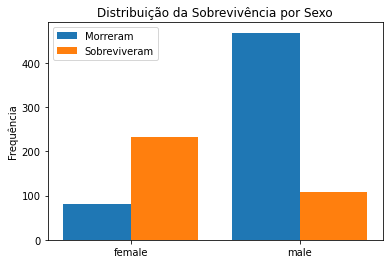

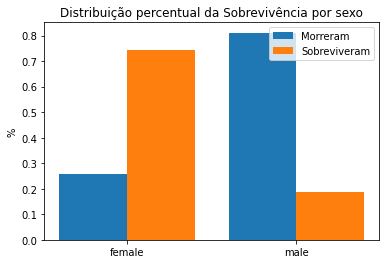

In [6]:
#Gráfico

#1. Criação das variáveis que armazenarão os DataFrames que servirão de base para construção dos gráficos:
#1.1 df que demonstra e relaciona em frequencia absoluta a relação entre sobreviventes e sexo
df_sex = df.groupby('Sex').apply(lambda x: x.Survived.value_counts()).unstack()

#1.2 df que demonstra e relaciona em frequencia relativa a relação entre sobreviventes e sexo
df_sex_prob = df.groupby('Sex').apply(lambda x: x.Survived.value_counts()/x.shape[0]).unstack()

#2. Construção dos rotulos do gráfico (male, female - eixo x ; morreram, sobreviveram - eixo y)
labels = list(df_sex.index) #labels do gráfico de barras

#3. Retorna os valores do df para serem utilizados no gráfico
#3.1 Valores absolutos
morreram = df_sex[0].values #valores para construção do grafico de barras, lembrando (0) = morreram
sobreviveram = df_sex[1].values #valores para construção do grafico de barras, lembrando (1) = sobreviveram

#3.2 Valores relativos
morreram_prob = df_sex_prob[0].values #valores para construção do grafico de barras
sobreviveram_prob= df_sex_prob[1].values #valores para construção do grafico de barras

# Essa linha do código não ficou claro para mim (?)
x = np.arange(len(labels))  #localização dos labels

# Definindo a largura das barras
width = 0.40  

#Construção do primeiro gráfico:
fig, ax = plt.subplots() #construção do frame, criando figura e eixos

rects1 = ax.bar(x - width/2, morreram, width, label='Morreram') #valores para construção do gráfico de barras
rects2 = ax.bar(x + width/2, sobreviveram, width, label='Sobreviveram')

# Adicona título no gráfico, legenda nos eixos e no gráfico legenda
ax.set_ylabel('Frequência') #legenda eixo y
ax.set_title('Distribuição da Sobrevivência por Sexo') #titulo
ax.set_xticks(x) #seta a posição dos labels
ax.set_xticklabels(labels) # legenda dos labels do eixo x
ax.legend() #função para adicionar as legendas do gráfico
plt.show() #função para mostrar o gráfico

#Construção do segundo gráfico:
fig, ax1 = plt.subplots()
rects3 = ax1.bar(x - width/2, morreram_prob, width, label='Morreram')
rects4 = ax1.bar(x + width/2, sobreviveram_prob, width, label='Sobreviveram')

ax1.set_ylabel('%')
ax1.set_title('Distribuição percentual da Sobrevivência por sexo')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend()
plt.show()

**Qual conclusão você reforça com esses gráficos?**
Que pessoas do sexo feminino tiveram mais chance de sobreviver do que pessoas do sexo masculino.

#### Calcular o chi-quadrado

In [7]:
# 1) Distribuição geral da variável survived como já observado antes:

dist_geral = pd.DataFrame(round(df.Survived.value_counts()/df.shape[0],2))

dist_geral

,Survived
0,0.62
1,0.38


In [8]:
# 2) Tabelas de frequencia absoluta e relativa:

df_sex = df.groupby(['Sex']).apply(lambda x: x.Survived.value_counts()).unstack()

df_sex_prob = df.groupby(['Sex']).apply(lambda x: x.Survived.value_counts()/x.shape[0]).unstack()

df_sex_prob

,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


In [9]:
# 3) Adicionar o total para cada sexo na tabela de frequência absoluta:
# Aqui é criada a coluna total onde é somado os valores absolutos de homens e mulheres que morreram e sobreviveram
df_sex['total'] = df_sex[[0]].values + df_sex[[1]].values 

df_sex

,0,1,total
Sex,,,
female,81,233,314
male,468,109,577


In [10]:
# 4) Tabela de frequência esperada:

esp_0 = df_sex.total.values * dist_geral.iloc[0].values
esp_1 = df_sex.total.values * dist_geral.iloc[1].values

df_esp = pd.DataFrame(np.c_[esp_0,esp_1])

df_esp

,0,1
0,194.68,119.32
1,357.74,219.26


In [11]:
# 5) Cálculo do chi-quadrado

# calculo dos desvios:

desvios = (df_sex.iloc[:,:2].values - df_esp.values)

print(desvios)

# calculo dos desvios ao quadrado:

desvios_ao_quadaro = desvios**2

# calculo do chi-quadrado:

chi_quad = sum(sum(desvios_ao_quadaro/df_esp.values))

print("\nO chi-quadrado de Pearson é de:", chi_quad)

[[-113.68  113.68]
 [ 110.26 -110.26]]

O chi-quadrado de Pearson é de: 264.11838848422303


**O que significa o valor do chi-quadrado de Pearson?**, **Quais foram as suas conclusões?**

Indica uma estreita relação entre as variáveis 'Survived' e 'Sex' naquele evento. 

**Ex3:** Use o dataframe df, carregado abaixo, onde  cada observação corresponde a uma reclamação feita 
pelo consumidor, para responder as perguntas abaixo:

1 - Qual o número de reclamações por Estado?<br>
2 - Qual a quantidade de reclamações por sexo?<br>
3 - O tempo de resposta tem alguma correlação com a nota do consumidor?<br>
4 - Proporção de reclamações registradas e não respondidas.<br>
5 - Imagine que você é alguém responsável por monitorar a satisfação dos consumidores. Que outros tipos de pergunta e análises você entende que poderiam ser feitas? Acrescente mais duas perguntas feitas por você, bem como suas análises para responde-las. 
**Importante**: É interessante que as análises contenham gráficos. No dia-a-dia de um cientista, grande parte do  trabalho é analisar dados e gerar visualizações para apresentá-las.

_fonte_ : https://dados.gov.br/dataset/reclamacoes-do-consumidor-gov-br1 (Nesse link estão os dicionário de dados, caso possua dúvidas sobre base).

In [12]:
df = pd.read_csv("dadosgovbr---2014.csv",sep = ';', encoding="latin-1")

df.head()

,Gestor,Canal de Origem,Região,UF,Cidade,Sexo,Faixa Etária,Ano Abertura,Mês Abertura,Data Abertura,...,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Análise da Recusa,Edição de Conteúdo,Interação do Gestor,Total
0,Secretaria Nacional do Consumidor,Não identificado,SE,RJ,Itaboraí,M,entre 31 a 40 anos,2014,6,27/06/2014,...,Não comprei / contratei,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,N,N,1
1,Instituto Estadual de Proteção e Defesa do Con...,Não identificado,SE,ES,Serra,F,entre 31 a 40 anos,2014,6,11/06/2014,...,Internet,S,S,Finalizada avaliada,Não Resolvida,1.0,NaN,N,N,1
2,Secretaria Nacional do Consumidor,Não identificado,SE,RJ,Volta Redonda,M,entre 31 a 40 anos,2014,6,27/06/2014,...,Internet,S,S,Finalizada avaliada,Resolvida,5.0,NaN,N,N,1
3,Instituto de Promoção e Defesa do Cidadão e Co...,Não identificado,NE,MA,São Luís,F,entre 31 a 40 anos,2014,5,29/05/2014,...,Não comprei / contratei,S,S,Finalizada avaliada,Resolvida,5.0,NaN,N,N,1
4,Secretaria de Desenvolvimento Social e Direito...,Não identificado,NE,PE,Recife,M,entre 21 a 30 anos,2014,6,30/06/2014,...,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,N,N,1


In [13]:
df.shape

(43987, 38)

In [14]:
df.dtypes

Gestor                     object
Canal de Origem            object
Região                     object
UF                         object
Cidade                     object
Sexo                       object
Faixa Etária               object
Ano Abertura                int64
Mês Abertura                int64
Data Abertura              object
Hora Abertura              object
Data Resposta              object
Hora Resposta              object
Data Análise               object
Hora Análise               object
Data Recusa                object
Hora Recusa                object
Data Finalização           object
Hora Finalização           object
Prazo Resposta             object
Prazo Analise Gestor      float64
Tempo Resposta            float64
Nome Fantasia              object
Segmento de Mercado        object
Área                       object
Assunto                    object
Grupo Problema             object
Problema                   object
Como Comprou Contratou     object
Procurou Empre

In [15]:
df.describe()

,Ano Abertura,Mês Abertura,Prazo Analise Gestor,Tempo Resposta,Nota do Consumidor,Total
count,43987.0,43987.000000,1953.000000,41961.000000,28627.000000,43987.0
mean,2014.0,9.550435,4.768049,6.667572,3.007021,1.0
std,0.0,1.898572,4.395177,3.066805,1.681700,0.0
min,2014.0,5.000000,0.000000,0.000000,1.000000,1.0
25%,2014.0,8.000000,1.000000,4.000000,1.000000,1.0
50%,2014.0,10.000000,4.000000,8.000000,3.000000,1.0
75%,2014.0,11.000000,8.000000,9.000000,5.000000,1.0
max,2014.0,12.000000,15.000000,13.000000,5.000000,1.0


In [16]:
# Avaliar o que são os nulos com a área responsável pela base / técnicas de preenchimento

print("Total de reclamações:", df.Total.count())
print("\nTotal de informação nula na base:",df.isnull().sum().sum())
print("\nTotal de nulos por variável:\n",df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending= False))
print("\nTotal de linhas completamente preenchidas:", df.dropna().shape[0])

Total de reclamações: 43987

Total de informação nula na base: 275157

Total de nulos por variável:
 Data Análise            42034
Hora Análise            42034
Prazo Analise Gestor    42034
Análise da Recusa       41941
Data Recusa             41921
Hora Recusa             41921
Nota do Consumidor      15360
Data Resposta            2026
Hora Resposta            2026
Tempo Resposta           2026
Avaliação Reclamação     1834
dtype: int64

Total de linhas completamente preenchidas: 163


**1 - Qual o número de reclamações por Estado?**

In [17]:
#Verificando o número de dados nulos na coluna UF
df['UF'].isnull().sum()

0

In [18]:
#Número de reclamações por UF
df.groupby(['UF']).apply(lambda x: x.Total.value_counts()).unstack()

Total  UF
1      AC      449
       AL      104
       AM      291
       AP       18
       BA     2443
       CE     1068
       DF     1805
       ES     1081
       GO      886
       MA     1082
       MG     4186
       MS      531
       MT     1012
       PA      211
       PB      343
       PE     1626
       PI       77
       PR     6140
       RJ     4907
       RN      160
       RO      119
       RR       24
       RS     1941
       SC     1458
       SE       97
       SP    11882
       TO       46
dtype: int64

**2 - Qual a quantidade de reclamações por sexo?**

In [19]:
#Verificando o número de dados nulos na coluna sexo
df['Sexo'].isnull().sum()

0

In [20]:
#Número de reclamações por sexo
df.groupby(['Sexo']).apply(lambda x: x.Total.value_counts()).unstack()

Total  Sexo
1      F       16092
       M       27895
dtype: int64

**3 - O tempo de resposta tem alguma correlação com a nota do consumidor?**

In [21]:
#Renomeando as colunas para não ter problema na utilização das fórmulas
df.rename(columns = {"Nota do Consumidor":"NotaConsumidor","Tempo Resposta":"TempoResposta"}, inplace= True)

In [22]:
#todas as linhas e apenas duas colunas 
dados = df.loc[:, ["NotaConsumidor","TempoResposta"]]
dados

,NotaConsumidor,TempoResposta
0,NaN,5.0
1,1.0,6.0
2,5.0,5.0
3,5.0,0.0
4,NaN,1.0
...,...,...
43982,NaN,10.0
43983,1.0,5.0
43984,1.0,3.0
43985,NaN,8.0


In [23]:
#análise de frequência relativa - Nota do Consumidor x Tempo Resposta
df_analise = df.groupby(['NotaConsumidor']).apply(lambda x: (x.TempoResposta.value_counts()/x.shape[0])*100).unstack().round(2)

In [24]:
df_analise.head()

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
NotaConsumidor,,,,,,,,,,,,,,
1.0,1.51,4.65,4.72,4.92,5.00,5.53,5.81,8.27,13.11,14.83,30.80,0.03,0.01,0.02
2.0,1.44,4.63,6.02,5.11,4.90,6.66,6.34,8.84,13.63,12.99,29.23,NaN,NaN,NaN
3.0,3.50,6.43,6.65,5.82,6.30,6.03,6.67,9.23,12.38,14.06,22.68,NaN,NaN,NaN
4.0,2.46,8.17,7.22,6.99,7.50,7.61,7.80,9.98,11.30,11.37,19.42,0.05,NaN,NaN
5.0,3.99,8.80,8.27,7.59,7.41,7.44,8.19,9.76,11.26,10.09,17.00,NaN,NaN,NaN


In [25]:
#Calculando a variância global da fare
var_global = np.var(df.TempoResposta)

#calculando a variância em cada categoria da Survived
var_categ = df.groupby('NotaConsumidor').apply(lambda x: np.var(x.TempoResposta))
total_categ = df.NotaConsumidor.value_counts()

#Variância ponderada pelo número de observações na categoria
var_ = (total_categ[1]* var_categ[1] + total_categ[2] * var_categ[2] + total_categ[3]* var_categ[3] + total_categ[4] * var_categ[4] + total_categ[5]* var_categ[5])/ (total_categ[1] + total_categ[2] + total_categ[3] + total_categ[4] + total_categ[5])

#r quadrado
r_quad = (var_global - var_)/ var_global ; 

print("O r-quadrado para TempoResposta e NotaConsumidor é:", round(r_quad*100,2))

O r-quadrado para TempoResposta e NotaConsumidor é: -0.73


A partir do R2 encontrado, percebe-se que 73% da nota que o consumidor pode ser explicada pelo tempo de resposta. Logo, quanto mais tempo demora a responder a tendência eh que a nota seja mais baixa. O valor negativo do R2 apenas demonstra essa "relação inversa": Quanto MAIOR o TempoResposta MENOR a NotaConsumidor.

**4 - Proporção de reclamações registradas e não respondidas.**

In [26]:
(df.Respondida.value_counts()/df.shape[0]).round(2)

S    0.95
N    0.05
Name: Respondida, dtype: float64

Apenas 5% das reclamações registradas não foram respondidas

**5 - Imagine que você é alguém responsável por monitorar a satisfação dos consumidores. Que outros tipos de pergunta e análises você entende que poderiam ser feitas?** Acrescente mais duas perguntas feitas por você, bem como suas análises para responde-las. Importante: É interessante que as análises contenham gráficos. No dia-a-dia de um cientista, grande parte do trabalho é analisar dados e gerar visualizações para apresentá-las.

5.1 Existe correlação entre a região de atendimento e a nota do consumidor?

5.2 Qual a correlação entre a Faixa Etária e a Nota do Consumidor?